$$\require{mhchem}$$

# Modelling complex reactions
_This lab is based on the material in Fogler, Elements of Chemical Reaction Engineering (2006, 4th ed)_ 

_Revised Oct 2024 to adapt to using Python._

## Introduction

During this computer lab you will model a number of complex reactions systems using Python and Jupyter notebook. You will first work in groups to come up with appropriate mathematical descriptions of the systems, with appropriate reference to principles of mass balance and reaction kinetics. After that you will convert these models into Matlab functions and scripts so that you can solve the systems’ ordinary differential equations to get information about how the system behaves with time/reactor volume. 

__At the end of this computer laboratory exercise, you should be able to:__ 
* Describe the kinetic behaviour of a multiple reaction system in a reactor using ordinary 
differential equations as well as other input parameters and equations. 
* Model the kinetic behaviour of such systems as a function of time/reactor volume by solving 
the appropriate systems of ordinary differential equations using Matlab. 
* Analyse the results of the modelling and discuss their physical interpretation and relevance 
to process optimisation. 

#### This computer lab is divided into three parts. Parts 1 and 2 will be completed during the first lab day. Part 3 requires some prior preparation and will be completed during the second lab day. 
1. Modelling of a simple series of consecutive reactions.
> Here you will be reminded of how to set up a kinetics model for a reaction mechanism based on rate equations. You will also be reminded how to solve systems of ordinary differential equations using an ODE solver in the Scipy library.

2. Modelling a more complex reaction mechanism
> With somewhat less guidance, you will set up the kinetics model for a more complex set of reactions taking place in a plug-flow reactor (PFR). By solving the resulting set of ordinary differential equations, you will numerically model how the concentrations of the different reactants and products change along the length of the PFR.

There are numerous leading questions in text boxes throughout Parts 1 and 2. These are meant to provide guidance to help you build and understand the models. The answers to these questions do not need to be handed in, but you will be examined orally by explaining your answers to the lab teacher.

3. Modelling of a bioreactor
> You are given background information of the growth characteristics of microorganisms and factors that influence their growth and product formation. Using this information, you will come up with a model for modelling cell growth, substrate consumption and product formation in a bioreactor time. This model will then be implemented and solved numerically. The results are to be presented, interpreted and discussed in a written report. 
<hr>

## 1. Warming up : consecutive reaction mechanism

**In this section, you will go through a worked example to analyse a simple consecutive reaction mechanism using rate equations, and then solve the resulting system of ordinary differential equations (ODEs) using Python.** 

**The aim is to both illustrate/remind you how to construct kinetic models in order to be able to model how species’ concentrations vary with time, as well as to refresh your knowledge about Python.**

### 1.1 The reaction mechanism
Consider a reaction in the liquid phase (i.e. no change in volume/flow rate) where a reactant A reacts to first build an intermediate I, which in turn reacts to form the final product P:

$$\ce{A ->[k_1] I ->[k_2] P}$$
    
where $k_1$ and $k_2$ are the rate constants of the two respective reactions.

An example of this kind of reaction mechanism is the oxidation of ethanol to form acetaldehyde and then acetic acid. In the body these reactions are catalysed by the enzymes alcohol dehydrogenase (ADH) and aldehydehydrogenase (ALDH2), respectively.

### The kinetic model: how do the concentrations change with time?
It is obvious that concentration of the species A, I and P are going to change with time, and also depend on how fast these two consecutive reactions are relative to each other. But how can this be described mathematically?

From reaction kinetics we know that, if the mechanism above represents a series of elementary reactions, then the rate of reaction ($r_i$) is equal to the rate constant times the concentration of the reactant(s) ($C_i$) of the reaction raise to the power of the respective order of reaction ($m$).

<br>
<center>Rate = (rate constant)(reaction concentration)<sup>(order or reaction)</sup></center><br>
$$r_i = k C_i^m$$

For multiple reactions, the net rate of reaction for a particular species is simply the sum of the rates for that species in each of the reactions involved (see below).

For the mechanism above, the rate of disappearance of reactant A is given by:

$$r_A = \frac{dC_A}{dt} = -k_1C_A$$

The negative sign indicates consumption of the reactant.

For the intermediate I, the net rate of reaction is the sum of its production from A, and its consumption to form P. In other words:

$$r_I=\frac{dC_I}{dt}=k_1C_A - k_2C_I$$

Note that both terms are given in terms of the concentration of the reactant for the reaction in question not the product’s concentration.

**Question: Why is reactant rather than product concentration used? Why do we sum up the terms?**

Answer:




For the product P, the rate equation is then:

$$r_P = \frac{dC_P}{dt} = k_2C_I$$

We now have a system of three ordinary differential equations (ODEs) that involve the variables $C_A$, $C_I$ and $C_P$. Solving this system with respect to time would then give us kinetic traces of how the concentration of these species change with time (Figure 1).

**Question: What is meant by “solving a system of ODEs”? What counts as an acceptable solution?**

Answer:



    

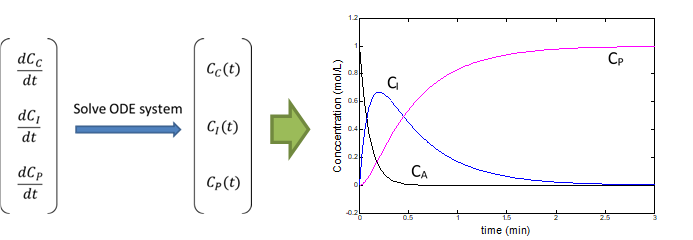
**Fig 1: Solving the ODE to give kinetic traces for the concentrations of the species in the consecutive reaction mechanism.**

While some systems of ODEs (such as this simple one) can be solved analytically, more complex ones often do not have analytical solutions and must be solved numerically. We will now use Matlab to perform such a numerical solution for the mechanism above.

### Solving ODEs with Python
There are Python libraries that can be used for doing mathematical procedures in scientific computation and visualisations. **Numpy** and **Scipy** are commonly used for numerical computations, with Scipy being more powerful for more advanced computations. **Matplotlib** is commonly used for data visualisation.

Each of these libraries needs to be imported before use. Commonly, the "nicknames" are used to simply the calling of functions from these libraries. 

#### Using the `odeint` solver
For solving ODEs, `odeint` is a common and easy to use function for simply ODE problems.

In [ ]:
import numpy as np   # import the whole Numpy library, with nickname np
from scipy.integrate import odeint   # import odeint from a part of the Scipy library
import matplotlib.pyplot as plt   # import a specific function från the matplotlib library and give it a nickname

To model our consecutive reaction mechanism $\ce{A ->[k_1] I ->[k_2] P}$, we need to define the set of ODEs describing the mechanism. This can be done by first defining the system of ODEs as a function, which is later forms part of the input for the ODE solver.

Note that the order of the dependent and independent variables in the function must correspond to what the ODE solver expects. As `odeint`, the dependent variable comes before the independent variable (as this solver is based on the convention used in older FORTRAN libraries).

See the [Scipy documentation on `odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint) to find out more about its syntax. 

In [ ]:
# Define the system of ODEs

# Define a function called rate_laws, with 'concentration' as the dependent variable
# and 't' as the independent variable.
def rate_laws(concentrations, t): 
        
    A, I, P = concentrations   # The individual species' concentrations are given as an array for the variable concentration.
    
    dA_dt = -k1 * A    # rate law for the reactant B
    
    # complete with the rate laws for B and C!
    dI_dt = k1 * A - k2 * I     
    dP_dt = k2 * I
    return [dA_dt, dI_dt, dP_dt] # Gives the output of the function as the array for the ODEs.

To further prepare for solving the system of ODEs, the values of the rate constants need to be defined. Also, as this is an initial value problem, the initial concentations of A, B and C need to be defined. Here, we assume that only A is present at time $t$ = 0.

In [ ]:
# Define the rate constants
k1 = 1.0  # Rate constant for A --> I
k2 = 0.5  # Rate constant for I --> P

# Initial concentrations
A0 = 1.0  # Initial concentration of A
I0 = 0.0  # Initial concentration of I
P0 = 0.0  # Initial concentration of P

For `odeint`, the time points used for solving the ODE also needs to be defined. These form the array $t$ that will be used  by the solver. The function `linspace`from Numpy can be used to create equally spaced points.

Note that it is obligatory to define the time points for solving the ODEs when using `odeint`, and these points must be monotonically increasing or decreasing (though repeats are allowed). Some other solvers do not have this requirement, and are able to adjust the time steps dynamically (see later).

In [ ]:
# Time points where solution is computed
t = np.linspace(0, 10, 100)   # 100 time points from 0 to 10.
print(t)  # This is not needed for the calculation - added just to show you what is being done.

**Questions:**

**(a) How do we know what the units of time are?**

**(b) When might it be good to use equally spaced time points? When might it not be? How would you choose how closely the time points are spaced?**

Answers:









Finally, we use the `odeint` function to solve the system of ODE. Give the output a name so that the results can be plotted afterwards.

In [ ]:
# Solve the system of ODEs
solution = odeint(rate_laws, [A0, I0, P0], t)
# output = odeint(function with the ODE, initial values, time points)

# The following is not necessary for the calcuation,
# but inserted here to help you to explore the structure of the output
print(solution) 
print(type(solution)) # data type of the output 
print(solution[0])
print(solution[10])
print(solution[:,0])

**Question: Given the printed outputs for the variable `solution` that contains the solution from the ODE solver, interpret how the concentrations as a function of time is stored in the variable.**

Answer:






Now we can plot the results using `plot` from `pyplot` (nicknamed `plt` above) from the Matplotlib library.
The output solution is a matrix containing the concentrations of A, B and C in their own columns (Python start numbering from 0). Each row corresponds to a time point given in the array $t$.

In [ ]:
# Plot the results
plt.plot(t, solution[:, 0], label='[A]')  # extract the concentration values of A, plot against time.
# Complete the commands for B, and C
plt.plot(t, solution[:, 1], label='[I]') 
plt.plot(t, solution[:, 2], label='[P]') 

# Add additional components of the graph
plt.xlabel('Time')  # label for the x-axis
plt.ylabel('Concentration') # label for the y-axis
plt.legend() # Show legend, the content is taken from the labels given above for each of the curves
plt.title('Concentration vs Time for Consecutive Reaction A --> I --> P') # Show title of the graph
plt.show() # Show the resulting plot

Note that you can customise the appearance of the curves in different ways (e.g. using different lines or no line, different colours, different data point markers etc). Examples can be found at e.g. https://python-course.eu/numerical-programming/formatting-plot-in-matplotlib.php and https://www.w3schools.com/python/matplotlib_plotting.asp. More extensive documentation and examples can be found on the [Matplotlib website](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

_**Try making changes to the code above to change customise the appearance of the graph!**_

**Question: Look back at the model that you have just set up and solved. For what kind of reactor (batch, 
CSTR, PFR) is the model appropriate for? Why?**

Answer:






**Questions:**

**(a) Consider Fig 1 and your results from the consecutive reaction mechanism. Why is there a peak in the curve for the reaction intermediate $I$?**

**(b) What changes in the system would make this peak concentration higher or lower? Try this by changing the script appropriately. Describe and explain the results of your trials.**

**(c)  How would you find out at what point in time the $C_I$ was the highest, and what that concentration was? <br> Write and test the Python code for this! Also, try changing the x-range on your plot and data markers to verify the results visually!**

Answer: (a) & (b)









In [ ]:
# Answer to (c)


#### Using the `solve_ivp` ODE solver

An alternative solver is `solve_ivp`, where ivp stands for "initial value problem".

This is a solver that gives the use more control over which algorithm is used for the solution, although it uses the Runge-Kutte 45 solver by default. It also allows the user to choose the stopping condition for the solution. It also can determine time steps dynamically, which means you only need to define the start and stop time point for the solution, not explicitly define the time points to be solved for.

For very large ODEs, this solver can be more efficient. The `odeint` solver above is nevertheless fine for simpler systems (like this one), and it's perhaps also somewhat simpler to use, as you may notice below.

But let's try solving the following, similar consecutive reaction mechanism using `solver_ivp`.

$$\ce{P ->[k_3] 2Q ->[k_4] R}$$

The rate constants $k_3$ and $k_4$ have values  $1.0 mol \cdot\ L^{-1}$ and  $0.50 mol \cdot\ L^{-1}$, respectively. At the beginning of the reaction, only P is present, at a concentration of $1.0 mol\cdot L^{-1}$.

Fill in the blanks in the following code! Differences specifically related to `solve_ivp` have been filled in and commented for you.

**Note that `solve_ivp` follows the more modern convention of expecting the independent variable before the dependent variable.** 

In [ ]:
# import what you will need from relevant libraries.
import numpy as np   # import the whole Numpy library, with nickname np
from scipy.integrate import solve_ivp   # import solve_ivp from a part of the Scipy library
import matplotlib.pyplot as plt   # import a specific function från the matplotlib library and give it a nickname

# Define the system of ODEs
def rate_laws_2(t, concentrations): # Take note of the order of the variables!
    P, Q, R = concentrations
    dP_dt = 

 
    return []

# Define the rate constants



# Define the initial concentrations




# Define the time span for the solution
t_span = (0, 10)    # Only the start and end times need to be defined for solve_ivp

# Solve the system of ODEs using solve_ivp
# by default the default method RK45 is used if not specified otherwise 
# Notice that the time span comes before the initial values for solve_ivp

solution = solve_ivp(rate_laws_2, t_span, [P0, Q0, R0], dense_output=True) 

# The following is again not necessary for the calculation
# but rather helps you to understand the structure of the output
print(solution)
print(type(solution))

# Extract the time points and concentrations from the solution. 
# Note that the "t" and "y" are attributes inherent to the
# output form the the solve_ivp function, hence the .-syntax.
# They are not related to the variable names given by the user

t = solution.t   # this extracts the x-values (named t by solve_ivp, as it's assumed to be time points)
concentrations = solution.y # this extracts the x-values (named y by solve_ivp)


# Plot the results
# Notice the different syntax here for extracting the concentrations of A compared with using odeint
# For solve_ivp, the results extracted using solution.y are all in the same *row*, hence "concentration[0]"
# For odeint, the concentrations for each species are in the output in separate *columns*, hence "solution[:,0]"

plt.plot(t, concentrations[0], label='[P]')  # concentration of P as a function of time.

# Complete the remaining code for plotting graph for all the species in the reaction.



**Questions:**

**(a) Why is the code for extracting the concentrations of P, Q and R for plotting in the format _concentration[#]_ here, rather than _solution[:, #]_ as was the case when we used the odeint solver?**

**(b) What do you notice about the resolution of the curves in the graph? Why is it so?**

**(c) What advantages and disadvantages do you see with this automatic choice of time points?**

Answers:







To change the resolution of the output, we use the fact that we set the `Dense_output` as true in using `solve_ivp`.
This generates an interpolant function ([output].sol) so that we can go back and evaluate the concentration for any given time point we want. In other words, we can now determine the resolution after the completing the calculation (rather than define the time points _before_ the calculation).

To do this, comment out the relevant part the code above, replace with this code, make any further adjustments as necessary to generate a new graph. 

`t_eval = np.linspace(0, 10, 100)`

`concentrations = solution.sol(t_eval)`

The concentrations will now be evaluated at the time points defined in `t_eval`.

**Question:**

**(a) What do you notice about the new graph?**

**(b) Discuss whether either of the results from these ODE solvers is more correct, and what sources of errors might be involved in each approach.**

Answers:






